Кравченко Юлии ПИ19-4 Вариант 12

Лабораторная работа 3

Задача оптимального выбора потребителя

In [1]:
import scipy.optimize
import numpy as np
from scipy.optimize import minimize
from sympy import *
import math 
import sympy as sym
from scipy import optimize,arange

import matplotlib.pyplot as plt
from sympy import symbols, Function
import sympy as sm
import pandas as pd


Данные для подстановки:

U=5*((x-4)**(2/3))*(y)**(5/8)

D=p*x+q*y-I

p=4

q=11

I=3037

Анализируемая функция f  для переменных x,y :
 f=  5*y**0.625*(x - 4)**0.666666666666667
Ограничения:  -I + p*x + q*y =0
Вспомогательная функция Лагранжа :
  lambda*(4*x + 11*y - 3037) + 5*y**0.625*(x - 4)**0.666666666666667
df/dx = 4*lambda + 3.33333333333333*y**0.625/(x - 4)**0.333333333333333 =0
df/dy = 11*lambda + 3.125*(x - 4)**0.666666666666667/y**0.375 =0
Sols: [{x: 393.806451612903, lambda: -2.42316041869543, y: 132.888563049853}]
x: 393.806451612903
y: 132.888563049853
Функция полезности при макс x и y: 5667.38138700300


<lambdifygenerated-5>:2: RuntimeWarning: invalid value encountered in power
  return 5*y**0.625*(x - 4)**0.666666666666667
C:\Users\kjd20\AppData\Local\Temp/ipykernel_25560/58445217.py:42: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X,Y,Z)


<Figure size 432x288 with 0 Axes>

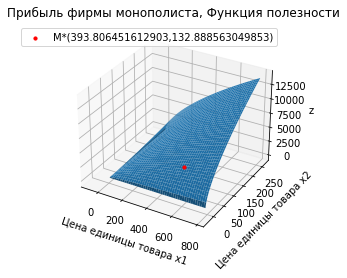

<lambdifygenerated-6>:2: RuntimeWarning: invalid value encountered in power
  return 5*y**0.625*(x - 4)**0.666666666666667
<lambdifygenerated-7>:2: RuntimeWarning: invalid value encountered in power
  return 5*y**0.625*(x - 4)**0.666666666666667


<Figure size 432x288 with 0 Axes>

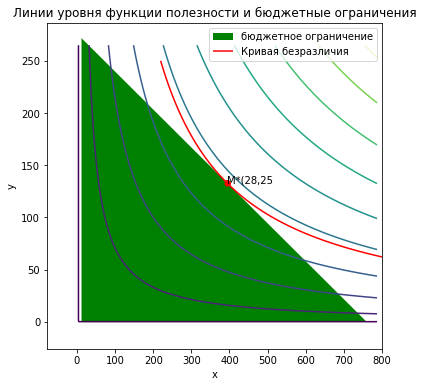

In [4]:
def optimVborPokum():
    x,y,lam,p,q,I=sm.symbols(' x y lambda p q I' )
    U = eval(input("Введите функцию полезности потребителя для двух товаров U, например 5*((x-4)**(2/3))*(y)**(5/8):"))
    D = eval(input("Введите функцию спроса q1, например  p*x+q*y-I:"))
    p1 = int(input("p"))
    q1 = int(input("q"))
    I1 = int(input("I"))
    
    print('Анализируемая функция f  для переменных x,y :\n f= ', U)
    
    print('Ограничения: ', D,'=0')

    lagr = U + D*lam
    lagr1 = lagr.subs([(p,p1),(q,q1),(I,I1)])
    D = D.subs([(p,p1),(q,q1),(I,I1)])

    print('Вспомогательная функция Лагранжа :\n ',lagr1)
    fx=sm.diff(lagr1,x)
    print('df/dx =',fx,'=0')
    fy=sm.diff(lagr1,y)
    print('df/dy =',fy,'=0')
    sols=solve([fx,fy,D],[x,y,lam], dict=True)
    print("Sols:",sols)
    x11 = sols[0][x]
    y22 = sols[0][y]
    print("x:",x11)
    print("y:",y22)
    x111 = int(x11)
    y222 =int(y22)
    U1 = U.subs([(x,x11),(y,y22),(p,p1),(q,q1),(I,I1)])
    print("Функция полезности при макс x и y:", U1)

    
    #3D график
    plt.figure()
    fig = plt.figure()
    ax=fig.add_subplot(1, 1, 1, projection = '3d')
    x = np.linspace(-x111*0.2,x111*2, x111*10)
    y = np.linspace(-y222*0.2,y222*2,y222*10)
    X,Y = np.meshgrid(x,y)
    Z = lambdify(["x","y"], U)(X,Y)
    ax.plot_surface(X,Y,Z)
    ax.scatter(x11,y22, s =10, color="red", label='М*({p11},{p22})'.format(p11=x11, p22=y22))
    plt.title('Прибыль фирмы монополиста, Функция полезности')
    plt.xlabel("Цена единицы товара x1")
    plt.ylabel("Цена единицы товара x2")
    ax.set_zlabel("z")
    #plt.zlabel("z")
    plt.legend()
    plt.show()


    #График №2
    x,y = np.mgrid[-0.2*x11:2*x11,-0.2*y22:2*y22]                
    z = lambdify(["x","y"], U)(x,y)
    fig = plt.figure()
    fig, ax = plt.subplots()
    ax.scatter(x11,y22, color='red')
    plt.text(x11,y22,'М*(28,25')
    x1 = np.linspace(q1+1, (I1/p1))
    y_treug = (I1 - p1 * x1) / q1
    y_2 = 0
    fig2 = ax.fill_between(x1, y_2, y_treug)
    fig2.set_facecolor('green')
    fig2.set_label("бюджетное ограничение")
    
    l = np.linspace(1, 800, 700)
    k = np.linspace(1, 250, 700)
    X, Y = np.meshgrid(l, k) # Определение координатных векторов
    Z = lambdify(["x","y"], U)(X,Y)
    cr = ax.contour(l, k, Z, levels=[U1], colors="red")
    cr.collections[0].set_label("Кривая безразличия")
    plt.plot(x11, y22, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
    fig.set_figwidth(6)
    fig.set_figheight(6)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Линии уровня функции полезности и бюджетные ограничения')

    ax.contour(x,y,z, levels = 10)
    plt.legend()
    plt.show()


    plt.show() 
optimVborPokum()    